In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = load_breast_cancer()
X = data.data

y = data.target

In [12]:
#print(X)

#print(y)

print(X.shape)
print(y.shape)
print(data.target_names)

(569, 30)
(569,)
['malignant' 'benign']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9736842105263158


In [7]:
print(confusion_matrix(y_test, y_pred))

[[41  2]
 [ 1 70]]


In [8]:
for name, coef in zip(data.feature_names, model.coef_[0]):
    print(f"{name}: {coef}")

mean radius: -0.43190367777433575
mean texture: -0.387325531141393
mean perimeter: -0.39343247642495854
mean area: -0.4652100607636046
mean smoothness: -0.07166727707541926
mean compactness: 0.5401639468319593
mean concavity: -0.8014580988560311
mean concave points: -1.1198040756502894
mean symmetry: 0.23611851556028285
mean fractal dimension: 0.07592092813647103
radius error: -1.2681781455073866
texture error: 0.18887738010991167
perimeter error: -0.6105830174385599
area error: -0.9071857032866883
smoothness error: -0.3133067534877945
compactness error: 0.6824914543472038
concavity error: 0.175274517136725
concave points error: -0.31129989981522344
symmetry error: 0.5004250240524791
fractal dimension error: 0.616229929659457
worst radius: -0.879840235250774
worst texture: -1.3506055922623306
worst perimeter: -0.5894527319656194
worst area: -0.8418459407075659
worst smoothness: -0.5441696698296071
worst compactness: 0.01611019428994873
worst concavity: -0.9430531344506445
worst concave

In [14]:
sample = X_test_scaled[0].reshape(1, -1)

prob = model.predict_proba(sample)
pred = model.predict(sample)

print("Probabilities:", prob)
print("Prediction:", pred)


Probabilities: [[0.11359025 0.88640975]]
Prediction: [1]


In [15]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]


In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [17]:
J = tpr - fpr
best_idx = np.argmax(J)
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)


Best threshold: 0.6206578599836922


In [18]:
y_pred_custom = (y_probs >= best_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print("Accuracy:", accuracy_score(y_test, y_pred_custom))


[[42  1]
 [ 1 70]]
Accuracy: 0.9824561403508771


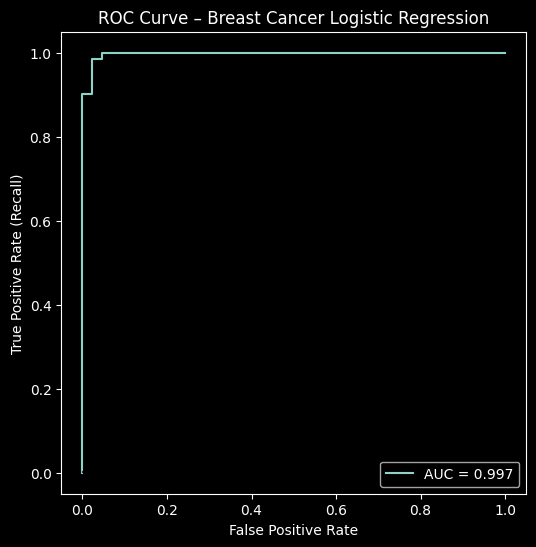

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')  # random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Breast Cancer Logistic Regression")
plt.legend()
plt.show()


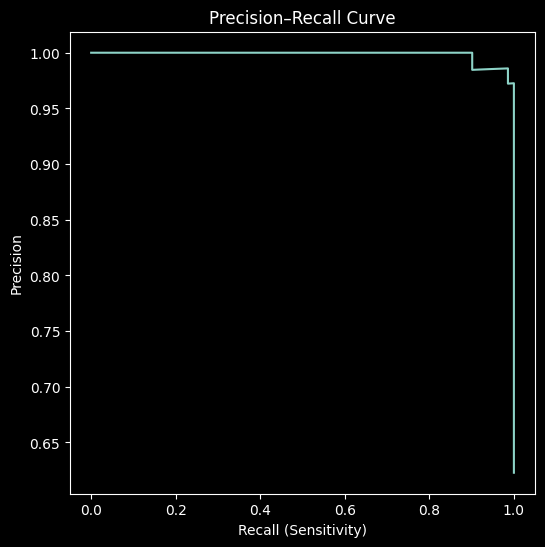

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,6))
plt.plot(recall, precision)
plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


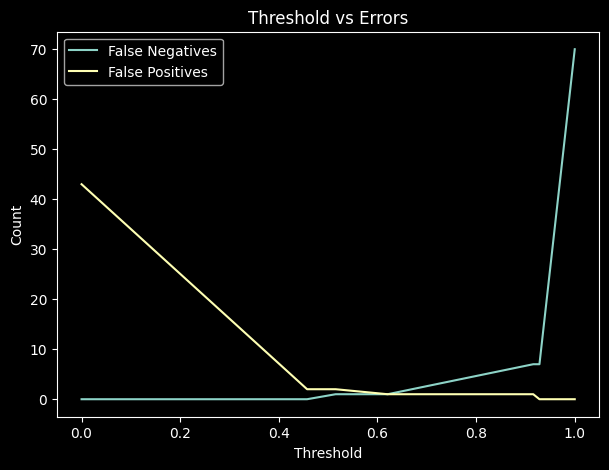

In [21]:
fns = []
fps = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_t)
    tn, fp, fn, tp = cm.ravel()
    fns.append(fn)
    fps.append(fp)

plt.figure(figsize=(7,5))
plt.plot(thresholds, fns, label="False Negatives")
plt.plot(thresholds, fps, label="False Positives")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("Threshold vs Errors")
plt.legend()
plt.show()
